# Analysis of COVID-19

### Content
+ Introduction: COVID-19
+ Data description and research questions
+ Data preparation
+ Data visualization
+ Conclusion

# 1. Introduction: COVID-19
Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic. As of 1 October 2020, more than 33.9 million cases have been reported across 188 countries and territories with more than 1.01 million deaths; more than 23.6 million people have recovered.

Common symptoms include fever, cough, fatigue, shortness of breath or breathing difficulties, and loss of smell and taste. While most people have mild symptoms, some people develop acute respiratory distress syndrome (ARDS) possibly precipitated by cytokine storm, multi-organ failure, septic shock, and blood clots. The incubation period may range from one to fourteen days.

The disease spreads between people most often when they are physically close. It spreads very easily and sustainably through the air, primarily via small droplets or particles such as aerosols, produced after an infected person breathes, coughs, sneezes, talks or sings. It may also be transmitted via contaminated surfaces, although this has not been conclusively demonstrated. It can spread for up to two days prior to symptom onset and from people who are asymptomatic. People remain infectious for 7–12 days in moderate cases and up to two weeks in severe cases. The standard method of diagnosis is by real-time reverse transcription polymerase chain reaction (rRT-PCR) from a nasopharyngeal swab. Chest CT imaging may also be helpful for diagnosis in individuals where there is a high suspicion of infection based on symptoms and risk factors, however guidelines do not recommend using it for routine screening.

I decided to analyze the spreading of COVID-19 around the world and how it's has affected to each 265 country.

Source: https://en.wikipedia.org/wiki/Coronavirus_disease_2019

# 2. Data description and research questions

We all know what COVID-19 is and what consequences it has, and how it has affected the whole world, but still it was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic. So I decided to do an analysis on the daily statistics about the coronavirus, made by Johns Hopkins University. In this analysis, we will look at countries around the world since the outbreak began. 

The subsequent analysis will be between the columns that are presented below:

+ Country_Region - country of residence(USA, China, Kazakhstan)
+ Confirmed - confirmed situations/cases within any country
+ Deaths - confirmed deaths within any country
+ Recovered - the number of people who were able to overcome the disease

I decided to analyze this topic in consequently ways(research questions):

1. Analyze the changing of variables by month +++
2. Analyze the difference between the number of new infections,deaths and cured people +++
3. Analyze the most pandemic country with confirmed cases +++
4. Analyze in what period of time was the peak and decline of the coronavirus in different countries? +++
5. Analyze the number of people who were able to recover around the world, by month +++



# 3. Data preparation

In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [132]:
# opening the first dataset
hp_file2 = open(file='time_series_covid19_confirmed_global.csv', 
               mode='r',
               encoding="ISO-8859-1")
#hp_file2.read()

In [133]:
# opening the second dataset
hp_file4 = open(file='covid19_deaths_global.csv', 
               mode='r',
               encoding="ISO-8859-1")
#hp_file4.read()

In [134]:
# opening the third dataset
hp_file5 = open(file='covid19_recovered_global.csv', 
               mode='r',
               encoding="ISO-8859-1")
#hp_file5.read()

# Further data preparation

## CONFIRMED CASES:

In [21]:
# EXPLANATION: Here I selected 10 different countries and amount of confirmed cases. 
# I chose one day of each month, here it's 22th day, 1/22/20 : 22th January; 
# I also added new columns called Population and Total cases;

confirmed_global = pd.read_csv('time_series_covid19_confirmed_global.csv')
cg = confirmed_global[['Country/Region', '1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20']]
x = cg.loc[[2,6,69,130,132,145,153,241,242,264]]

df = pd.DataFrame(x)
population = [43851044,45195774,11800000,83783942,10423054 ,83992949,18776707,84339067,331658650,18383955]
df['Population'] = population
df['% of cases per population'] = (df['9/22/20']*100) / df['Population']

val = "Wuhan"
row = x.loc[69, :]
t = type(row['Country/Region'])
val = t(val)
x.loc[69, 'Country/Region'] = val

df




,Country/Region,1/22/20,2/22/20,3/22/20,4/22/20,5/22/20,6/22/20,7/22/20,8/22/20,9/22/20,Population,% of cases per population
2,Algeria,0,0,201,2910,7918,11920,24872,41068,50214,43851044,0.114510
6,Argentina,0,0,266,3144,10649,44931,141900,336802,652174,45195774,1.442998
69,Wuhan,444,64084,67800,68128,68135,68135,68135,68139,68139,11800000,0.577449
130,Germany,0,16,24873,150648,179710,191768,204276,233861,277412,83783942,0.331104
132,Greece,0,0,624,2408,2874,3287,4077,8381,15928,10423054,0.152815
145,Iran,0,28,21638,85996,131652,207525,281413,356792,429193,83992949,0.510987
153,Kazakhstan,0,0,60,2135,7919,18231,75153,104543,107450,18776707,0.572252
241,Turkey,0,0,1236,98674,154500,188897,222402,257032,306302,84339067,0.363179
242,US,1,16,34804,845361,1607949,2308050,3964927,5659837,6896218,331658650,2.079312
264,Zambia,0,0,3,74,920,1430,3583,10831,14389,18383955,0.078269


## DEATH CASES:

In [13]:
# EXPLANATION: Here I selected 10 different countries and amount of death people. 
# I chose one day of each month, here it's 22th day, 1/22/20 : 22th January; 
# I also added new column called Population and percent of death population;
deaths_global = pd.read_csv('covid19_deaths_global.csv')
dg = deaths_global[['Country/Region', '1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20']]
x = dg.loc[[2,6,69,130,132,145,153,241,242,264]]

val = "Wuhan"
row = x.loc[69, :]
t = type(row['Country/Region'])
val = t(val)
x.loc[69, 'Country/Region'] = val

death = pd.DataFrame(x)
population = [43851044,45195774,11800000,83783942,10423054 ,83992949 ,18776707,84339067,331658650,18383955]
death['Population'] = population
death['% of deaths per population'] = (death['9/22/20']*100) / death['Population']

death

,Country/Region,1/22/20,2/22/20,3/22/20,4/22/20,5/22/20,6/22/20,7/22/20,8/22/20,9/22/20,Population,% of deaths per population
2,Algeria,0,0,17,402,582,852,1111,1424,1689,43851044,0.003852
6,Argentina,0,0,4,152,433,1043,2588,6848,13952,45195774,0.030870
69,Wuhan,17,2346,3153,4512,4512,4512,4512,4512,4512,11800000,0.038237
130,Germany,0,0,94,5279,8228,8899,9102,9272,9405,83783942,0.011225
132,Greece,0,0,15,121,169,190,200,240,352,10423054,0.003377
145,Iran,0,5,1685,5391,7300,9742,14853,20502,24656,83992949,0.029355
153,Kazakhstan,0,0,0,19,35,127,585,1415,1699,18776707,0.009048
241,Turkey,0,0,30,2376,4276,4974,5545,6102,7639,84339067,0.009057
242,US,0,0,573,49632,99166,123170,144059,176318,200786,331658650,0.060540
264,Zambia,0,0,0,3,7,11,128,279,331,18383955,0.001800


## RECOVERED CASES:

In [14]:
# EXPLANATION: Here I selected 10 different countries and amount of recovered people. 
# I chose one day of each month, here it's 22th day, 1/22/20 : 22th January; 
# I also added new column called Population and percent of recovered cases per capita;

recovered = pd.read_csv('covid19_recovered_global.csv')
r = recovered[['Country/Region', '1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20']]
x = r.loc[[2,6,56, 117,119,132,140,228,229,251]]

val = "Wuhan"                       # I'm changing China -> Wuhan
row = x.loc[56, :]
t = type(row['Country/Region'])
val = t(val)
x.loc[56, 'Country/Region'] = val

recover = pd.DataFrame(x)
# Adding new column Popilation
population = [43851044,45195774,11800000,83783942,10423054,83992949,18776707,84339067,331658650,18383955] 
recover['Population'] = population
# Adding new column % of recovered
recover['% of recovered per population'] = (recover['9/22/20']*100) / recover['Population']

recover

,Country/Region,1/22/20,2/22/20,3/22/20,4/22/20,5/22/20,6/22/20,7/22/20,8/22/20,9/22/20,Population,% of recovered per population
2,Algeria,0,0,65,1204,4256,8559,16983,28874,35307,43851044,0.080516
6,Argentina,0,0,3,872,3062,13153,60531,245781,517228,45195774,1.144417
56,Wuhan,28,15299,59433,63519,63616,63623,63623,63626,63627,11800000,0.539212
117,Germany,0,14,266,99400,159064,175143,188628,207606,244693,83783942,0.292052
119,Greece,0,0,19,577,1374,1374,1374,1347,1347,10423054,0.012923
132,Iran,0,0,7931,63113,102276,166427,244840,307702,363737,83992949,0.433057
140,Kazakhstan,0,0,0,515,4096,11158,46790,91089,102064,18776707,0.543567
228,Turkey,0,0,0,16477,116111,161533,205214,236370,269696,84339067,0.319776
229,US,0,5,178,77366,350135,640198,1210849,1985484,2646959,331658650,0.798097
251,Zambia,0,0,0,35,336,1194,1677,9942,13629,18383955,0.074135


Our "date" columns show the total number of infected / dead / cured people in a given time period. However, in order to determine how many people were infected /died /recovered in any time period, for example from 7/22/20 to 8/22/20, we must subtract the following month from the previous one. So I decided to build new table, referring to original one.


## PARTICULAR RECOVERED CASES:

In [15]:
# I made a new recovered table with discrete values in each month 

recovered = pd.read_csv('covid19_recovered_global.csv')
r = recovered[['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20']]
x = r.loc[[2,6,56, 117,119,132,140,228,229,251]]

a = x.diff(axis=1)          #Finding differences between column and prev.column
b = a.fillna(0)      # Converting NaN values into 0

data = pd.DataFrame(b)
country = recovered['Country/Region']
population = [43851044,45195774,11800000,83783942,10423054 ,83992949,18776707,84339067,331658650,18383955]

# Adding new columns
data['Total'] = data.sum(axis=1)
data['Population'] = population
data['Country'] = country 
data['% of recovered per population'] = (data['Total']*100) / data['Population']

data

,1/22/20,2/22/20,3/22/20,4/22/20,5/22/20,6/22/20,7/22/20,8/22/20,9/22/20,Total,Population,Country,% of recovered per population
2,0.0,0.0,65.0,1139.0,3052.0,4303.0,8424.0,11891.0,6433.0,35307.0,43851044,Algeria,0.080516
6,0.0,0.0,3.0,869.0,2190.0,10091.0,47378.0,185250.0,271447.0,517228.0,45195774,Argentina,1.144417
56,0.0,15271.0,44134.0,4086.0,97.0,7.0,0.0,3.0,1.0,63599.0,11800000,China,0.538975
117,0.0,14.0,252.0,99134.0,59664.0,16079.0,13485.0,18978.0,37087.0,244693.0,83783942,Germany,0.292052
119,0.0,0.0,19.0,558.0,797.0,0.0,0.0,-27.0,0.0,1347.0,10423054,Greece,0.012923
132,0.0,0.0,7931.0,55182.0,39163.0,64151.0,78413.0,62862.0,56035.0,363737.0,83992949,Iran,0.433057
140,0.0,0.0,0.0,515.0,3581.0,7062.0,35632.0,44299.0,10975.0,102064.0,18776707,Kazakhstan,0.543567
228,0.0,0.0,0.0,16477.0,99634.0,45422.0,43681.0,31156.0,33326.0,269696.0,84339067,Turkey,0.319776
229,0.0,5.0,173.0,77188.0,272769.0,290063.0,570651.0,774635.0,661475.0,2646959.0,331658650,US,0.798097
251,0.0,0.0,0.0,35.0,301.0,858.0,483.0,8265.0,3687.0,13629.0,18383955,Zambia,0.074135


 In my opinion, person who did this dataset, mismatched value in Greece(8/22/20 and 9/22/20). Because in 7/22/20 amount of curved people were 1374, but in 8/22/20 it became to 1347. Therefore, amount of people became -27.


## TRANSPOSED PARTICULAR RECOVERED CASES

In [16]:
# I made new comfortable column to draw line graph to find peak and decline of the coronavirus in different countries
# I dropped multiple, cause I don't need them in my graph
z = data.drop(['Total','Population','% of recovered per population','Country'], axis=1)

z.index = pd.Index(['Algeria','Argentina','Wuhan','Germany','Greece','Iran','Kazakhstan','Turkey','USA','Zambia'],name='Date')
rec_transp = z.transpose()

rec_transp


Date,Algeria,Argentina,Wuhan,Germany,Greece,Iran,Kazakhstan,Turkey,USA,Zambia
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/22/20,0.0,0.0,15271.0,14.0,0.0,0.0,0.0,0.0,5.0,0.0
3/22/20,65.0,3.0,44134.0,252.0,19.0,7931.0,0.0,0.0,173.0,0.0
4/22/20,1139.0,869.0,4086.0,99134.0,558.0,55182.0,515.0,16477.0,77188.0,35.0
5/22/20,3052.0,2190.0,97.0,59664.0,797.0,39163.0,3581.0,99634.0,272769.0,301.0
6/22/20,4303.0,10091.0,7.0,16079.0,0.0,64151.0,7062.0,45422.0,290063.0,858.0
7/22/20,8424.0,47378.0,0.0,13485.0,0.0,78413.0,35632.0,43681.0,570651.0,483.0
8/22/20,11891.0,185250.0,3.0,18978.0,-27.0,62862.0,44299.0,31156.0,774635.0,8265.0
9/22/20,6433.0,271447.0,1.0,37087.0,0.0,56035.0,10975.0,33326.0,661475.0,3687.0


## PARTICULAR CONFIRMED CASES:

In [17]:
# I made a new confirmed cases table with discrete values in each month 

confirmed_global = pd.read_csv('time_series_covid19_confirmed_global.csv')
cg = confirmed_global[['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20']]
x = cg.loc[[2,6,69,130,132,145,153,241,242,264]]

c = x.diff(axis=1)        #Finding differences between column and prev.column
d = c.fillna(0)       #Converting NaN values into 0

confirm_discrete = pd.DataFrame(d)
country = confirmed_global['Country/Region']
population = [43851044,45195774,11800000,83783942,10423054,83992949,18776707,84339067,331658650,18383955]

# Adding new columns
confirm_discrete['Total'] = confirm_discrete.sum(axis=1)
confirm_discrete['Population'] = population
confirm_discrete['Country'] = country 
confirm_discrete['% of confirmed per population'] = (confirm_discrete['Total']*100) / confirm_discrete['Population']

confirm_discrete


,1/22/20,2/22/20,3/22/20,4/22/20,5/22/20,6/22/20,7/22/20,8/22/20,9/22/20,Total,Population,Country,% of confirmed per population
2,0.0,0.0,201.0,2709.0,5008.0,4002.0,12952.0,16196.0,9146.0,50214.0,43851044,Algeria,0.114510
6,0.0,0.0,266.0,2878.0,7505.0,34282.0,96969.0,194902.0,315372.0,652174.0,45195774,Argentina,1.442998
69,0.0,63640.0,3716.0,328.0,7.0,0.0,0.0,4.0,0.0,67695.0,11800000,China,0.573686
130,0.0,16.0,24857.0,125775.0,29062.0,12058.0,12508.0,29585.0,43551.0,277412.0,83783942,Germany,0.331104
132,0.0,0.0,624.0,1784.0,466.0,413.0,790.0,4304.0,7547.0,15928.0,10423054,Greece,0.152815
145,0.0,28.0,21610.0,64358.0,45656.0,75873.0,73888.0,75379.0,72401.0,429193.0,83992949,Iran,0.510987
153,0.0,0.0,60.0,2075.0,5784.0,10312.0,56922.0,29390.0,2907.0,107450.0,18776707,Kazakhstan,0.572252
241,0.0,0.0,1236.0,97438.0,55826.0,34397.0,33505.0,34630.0,49270.0,306302.0,84339067,Turkey,0.363179
242,0.0,15.0,34788.0,810557.0,762588.0,700101.0,1656877.0,1694910.0,1236381.0,6896217.0,331658650,US,2.079312
264,0.0,0.0,3.0,71.0,846.0,510.0,2153.0,7248.0,3558.0,14389.0,18383955,Zambia,0.078269


## TRANSPOSED PARTICULAR CONFIRMED CASES

In [18]:
# I made new comfortable column to draw line graph to find peak and decline of the coronavirus in different countries
# I dropped multiple, cause I don't need them in my graph
z = confirm_discrete.drop(['Total','Population','% of confirmed per population','Country'], axis=1)

z.index = pd.Index(['Algeria','Argentina','Wuhan','Germany','Greece','Iran','Kazakhstan','Turkey','USA','Zambia'],name='Date')
peak_decline = z.transpose()

peak_decline



Date,Algeria,Argentina,Wuhan,Germany,Greece,Iran,Kazakhstan,Turkey,USA,Zambia
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/22/20,0.0,0.0,63640.0,16.0,0.0,28.0,0.0,0.0,15.0,0.0
3/22/20,201.0,266.0,3716.0,24857.0,624.0,21610.0,60.0,1236.0,34788.0,3.0
4/22/20,2709.0,2878.0,328.0,125775.0,1784.0,64358.0,2075.0,97438.0,810557.0,71.0
5/22/20,5008.0,7505.0,7.0,29062.0,466.0,45656.0,5784.0,55826.0,762588.0,846.0
6/22/20,4002.0,34282.0,0.0,12058.0,413.0,75873.0,10312.0,34397.0,700101.0,510.0
7/22/20,12952.0,96969.0,0.0,12508.0,790.0,73888.0,56922.0,33505.0,1656877.0,2153.0
8/22/20,16196.0,194902.0,4.0,29585.0,4304.0,75379.0,29390.0,34630.0,1694910.0,7248.0
9/22/20,9146.0,315372.0,0.0,43551.0,7547.0,72401.0,2907.0,49270.0,1236381.0,3558.0


## PARTICULAR DEATH CASES:


In [19]:
# I made a new death table with discrete values in each month 

deaths_global = pd.read_csv('covid19_deaths_global.csv')
dg = deaths_global[['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20']]
x = dg.loc[[2,6,69,130,132,145,153,241,242,264]]

f = x.diff(axis=1)        #Finding differences between column and prev.column
g = f.fillna(0)       #Converting NaN values into 0

death_discrete = pd.DataFrame(g)
country = deaths_global['Country/Region']
population = [43851044,45195774,11800000,83783942,10423054,83992949,18776707,84339067,331658650,18383955]

# Adding new columns
death_discrete['Total'] = death_discrete.sum(axis=1)
death_discrete['Population'] = population
death_discrete['Country'] = country 
death_discrete['% of death per population'] = (death_discrete['Total']*100) / death_discrete['Population']

death_discrete

,1/22/20,2/22/20,3/22/20,4/22/20,5/22/20,6/22/20,7/22/20,8/22/20,9/22/20,Total,Population,Country,% of death per population
2,0.0,0.0,17.0,385.0,180.0,270.0,259.0,313.0,265.0,1689.0,43851044,Algeria,0.003852
6,0.0,0.0,4.0,148.0,281.0,610.0,1545.0,4260.0,7104.0,13952.0,45195774,Argentina,0.030870
69,0.0,2329.0,807.0,1359.0,0.0,0.0,0.0,0.0,0.0,4495.0,11800000,China,0.038093
130,0.0,0.0,94.0,5185.0,2949.0,671.0,203.0,170.0,133.0,9405.0,83783942,Germany,0.011225
132,0.0,0.0,15.0,106.0,48.0,21.0,10.0,40.0,112.0,352.0,10423054,Greece,0.003377
145,0.0,5.0,1680.0,3706.0,1909.0,2442.0,5111.0,5649.0,4154.0,24656.0,83992949,Iran,0.029355
153,0.0,0.0,0.0,19.0,16.0,92.0,458.0,830.0,284.0,1699.0,18776707,Kazakhstan,0.009048
241,0.0,0.0,30.0,2346.0,1900.0,698.0,571.0,557.0,1537.0,7639.0,84339067,Turkey,0.009057
242,0.0,0.0,573.0,49059.0,49534.0,24004.0,20889.0,32259.0,24468.0,200786.0,331658650,US,0.060540
264,0.0,0.0,0.0,3.0,4.0,4.0,117.0,151.0,52.0,331.0,18383955,Zambia,0.001800


In [22]:
# I merged my 3 dataframes into 1 table. I chose only columns that I needed, so it's the total number of confirmed cases/deaths/recovered

merges = df.merge(death,on='Country/Region').merge(recover,on='Country/Region')
result = merges[['Country/Region','9/22/20_x','9/22/20_y','9/22/20']]
# Renaming column names
final = result.rename(columns={'9/22/20_x': 'Confirmed cases', '9/22/20_y': 'Deaths','9/22/20': 'Recovered'})
final

,Country/Region,Confirmed cases,Deaths,Recovered
0,Algeria,50214,1689,35307
1,Argentina,652174,13952,517228
2,Wuhan,68139,4512,63627
3,Germany,277412,9405,244693
4,Greece,15928,352,1347
5,Iran,429193,24656,363737
6,Kazakhstan,107450,1699,102064
7,Turkey,306302,7639,269696
8,US,6896218,200786,2646959
9,Zambia,14389,331,13629


# 4. Data visualization

### Q1: Analyze the changing of variables by month

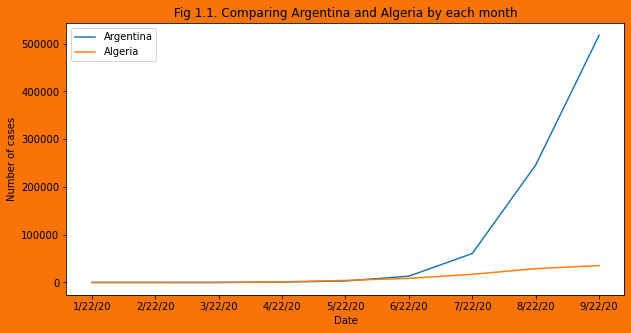

In [23]:
#I'm going to plot the graph of COVID-19 in Algeria and Argentina
fig, ax = plt.subplots(figsize = (10,5))  
fig.patch.set_facecolor('xkcd:orange') 

ax.plot(['1/22/20', '2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20'],[0,0,3,872,3062,13153,60531,245781,517228],label = 'Argentina')
ax.plot(['1/22/20', '2/22/20','3/22/20','4/22/20','5/22/20','6/22/20','7/22/20','8/22/20','9/22/20'],[0, 0, 65, 1204,4256,8559,16983,28874,35307],label = 'Algeria')

plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title("Fig 1.1. Comparing Argentina and Algeria by each month")

plt.legend()
plt.show()

In this graph, I decided to show the differences between the two countries, i.e. Algeria with a population of almost 44 million and Argentina with 45 million people. As we can see, the difference between the number of people living between them is not very large, but I was surprised by the fact that the number of infected people is very different from each other. The beginning of the tipping point is 6/22/20-7/22/20. Here the difference between them increased by as much as 40 thousand people and in the end it reached 481921 people. 



### Q2: Analyze the difference between the number of new infections,deaths and cured people

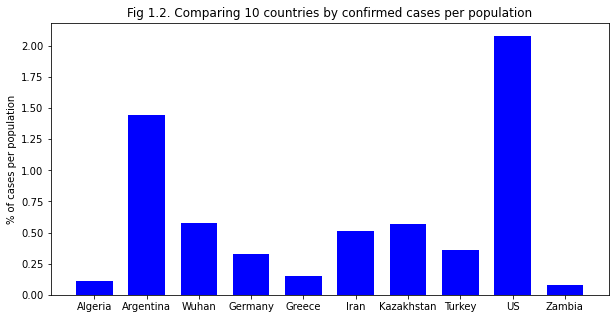

In [24]:
#I want to build bar chart to consider the difference in the number of cases of COVID-19 in countries per population.
fig, ax = plt.subplots(figsize = (10,5))
df['% of cases per population'] = (df['9/22/20']*100) / df['Population']

ax.bar(df['Country/Region'],df['% of cases per population'], color = 'b', width = 0.7)

ax.set_ylabel('% of cases per population')
ax.set_title('Fig 1.2. Comparing 10 countries by confirmed cases per population')

plt.show()

Using Fig 1.2 graph, I decided to analyze how COVID-19 spread in these 10 countries. Since the number of people is different everywhere, I calculated the percentage of cases of disease per capita

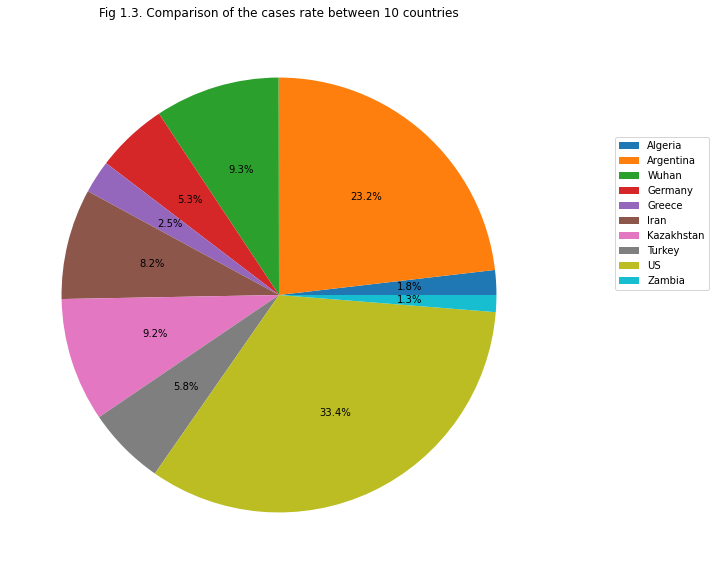

In [26]:
# Here I compared the percentages of cases between 10 countries. 

df['% of cases per population'] = (df['9/22/20']*100) / df['Population']

label = df['Country/Region']
size = df['% of cases per population']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(size,autopct='%1.1f%%')

plt.title('Fig 1.3. Comparison of the cases rate between 10 countries')
plt.legend(labels=label, loc='upper right',bbox_to_anchor=(1.3, 0.8))
plt.show()


Here I compared the percentages of cases between 10 countries. Thanks to this pie chart , we can identify the largest percentage and smallest percentage infected among these countries, that is, for example, in the USA the number of people is 331 million and the total number of infected about 7 million, and that approximately 2 percent of the total population, and in Kazakhstan, for example, 18 million people infected with 107 thousand and it is less than 1 percent. And this pie chart shows us the difference between the percentages of morbidity among these countries

# Further data visualization 

### Q3: Analyze the most pandemic country with confirmed cases

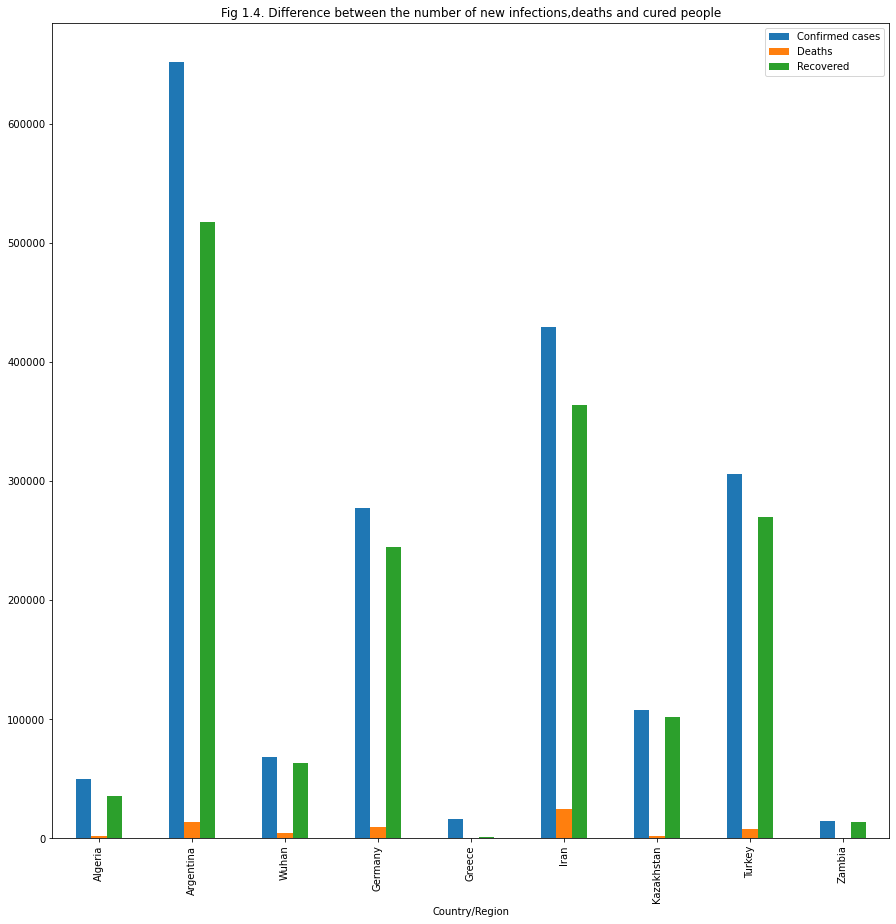

In [27]:
# I dropped US country, because the value was too big compared with others
dropped = final.drop([8]) 
dropped.plot(x="Country/Region", y=["Confirmed cases", "Deaths", "Recovered"],figsize=(15,15), kind="bar")
plt.title("Fig 1.4. Difference between the number of new infections,deaths and cured people")

    
plt.show()

In Fig 1.4, I decided to compare 3 dataframes (confirmed cases, deaths, recovered). And it shows us the difference in the number of the above items. In addition, I dropped the US because its value was too large compared to the rest of the countries, so the values of countries like Greece, Zambia would not be visible, since the difference in numbers is very large(in the US the number of infected is 7 million, and in Greece 15,000)

### Q4:  Analyze in what period of time was the peak and decline of the coronavirus in different countries?

I divided 10 countries by approximate similarity in the number of people. Group 1 includes Argentina and Algeria, with a population of approximately 45-47 million. In the second 2 group, countries with a popularity of 10-20 million people, and in 3 I included countries such as Germany, Iran and Turkey(83-84 million), but in the last group I decided to add the United States, since it is the highest of the above countries and there is no country in this list with a popularity approximate as the United States

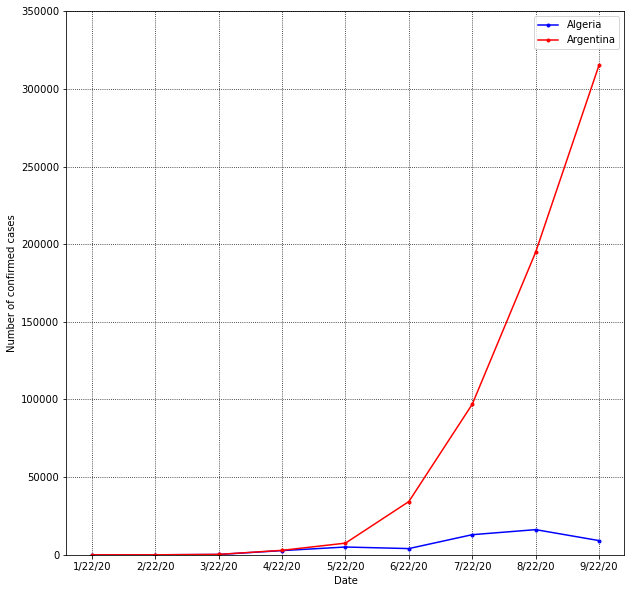

In [28]:
# 1 group: Algeria and Argentina 
fig, axs = plt.subplots(figsize=(10, 10))

# Drawing line graph, with blue line in Algeria and another one in Argentina
axs.plot(peak_decline.Algeria, 'b.-')
axs.plot(peak_decline.Argentina,'r.-')

# I did it for beauty of my graph, linestyle behind in black color
axs.grid(True, color='k', linestyle=':')
axs.legend(labels=label) # labeling legend
axs.set_xlabel('Date') #labeling x-axis
axs.set_ylabel('Number of confirmed cases') #labeling y-axis

axs.set_ylim(0,350000); # making limit of y-axis from 0 until 350000 
 



This graph shows a comparison in the number of confirmed cases between two countries like Argentina and Algeria. According to this line graph, we can find out that until may 22 in these two countries everything was approximately the same, but later there was a sharp jump in Argentina, the number of people increased sharply by 34 thousand, but in Algeria it was during this time period confirmed cases were 1000 people less than last month. In my opinion, the reason is that a strict quarantine regime was introduced mainly in Buenos Aires, where more than 90% of new cases of coronavirus were detected. And in other areas, the quarantine was not so strict, people could safely walk on the street. Thus, in the following months, more and more cases began to be identified throughout the country, so compared to Algeria, Argentina saw a sharp jump. Since this dataset was limited until September 22, the peak of COVID-19 in Argentina falls on September 22, but I believe in the following months, the number increased by a couple of thousand people. But in Algeria, as we can see, the peak was in August and then the decline began, I think that thanks to humanitarian assistance to African countries, fewer and fewer cases were detected in Algeria. In addition, the share of African countries in international passenger traffic is relatively small and most cases are registered in countries that are more integrated into the world economy and attract tourists.

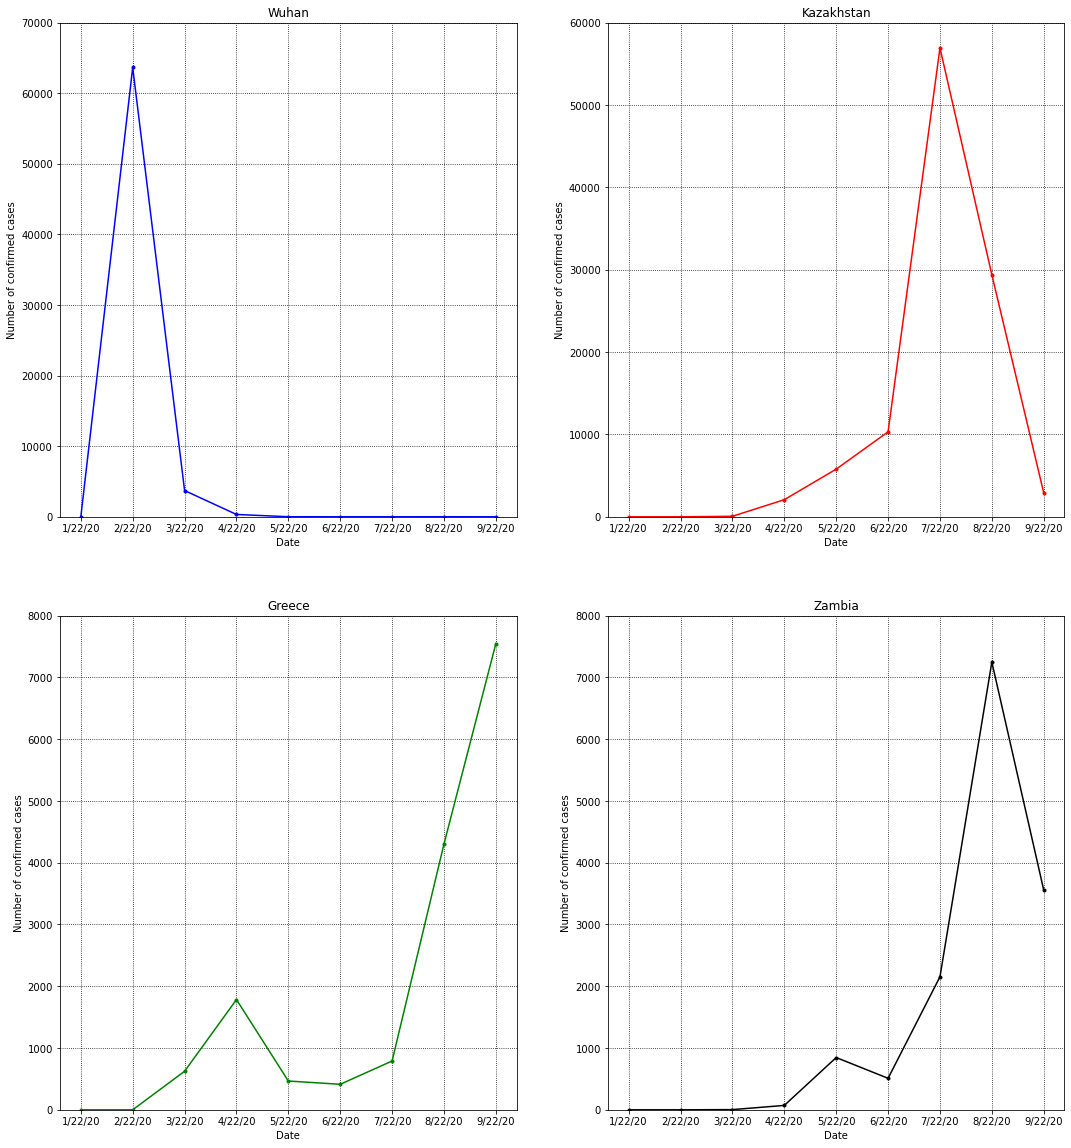

In [33]:
# 2nd group: Wuhan, Kazakhstan, Greece, Zambia.
plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
plt.plot(peak_decline.Wuhan, 'b.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Wuhan')
plt.ylim(0,70000)

plt.subplot(2,2,2)
plt.plot(peak_decline.Kazakhstan, 'r.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Kazakhstan')
plt.ylim(0,60000)

plt.subplot(2,2,3)
plt.plot(peak_decline.Greece, 'g.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Greece')
plt.ylim(0,8000)

plt.subplot(2,2,4)
plt.plot(peak_decline.Zambia, 'k.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Zambia')
plt.ylim(0,8000);




In this group of countries, I chose Kazakhstan, Greece, Zambia, and the city of Wuhan in China, since the population in the above is about the same.

First, I would like to consider the city of Wuhan, which is the focus of the COVID-19 outbreak. As we can see, the peak of the epidemic was between January and February. And according to indicators, in February 22, there was a peak of the disease and it is 63640 people. However, in the following months there was a sharp decline in the disease. I think one of the reasons for this decline is that Wuhan was able to mobilize forces, because the authorities were proactive and prepared hospitals in advance. In just ten days, a hospital for people infected with coronavirus, designed for a thousand people, was built from scratch on the outskirts of the city. Then they built a second one, but this was not enough, so large city sites were converted into hospitals. In addition, the victory of Wuhan over the coronavirus is due to the Chinese themselves. They showed great awareness in the fight against the disease. Even in the "soft" quarantine, they tried to limit contact with relatives, avoided public places and did not crowd into stores, waiting on the street until the trading floor becomes freer. Thus, to date, the number of new infections in Wuhan is close to zero.

If we consider Kazakhstan, then in our country, compared to Wuhan, the peak of the disease was in the summer(July-August). If in Wuhan with a population of 11 million people and an area of 8,494 km2, the decline began immediately in March, then in Kazakhstan with a population of 18 million and an area of 2,725,000 km2, only in the period August-September. I believe that one of the factors of this difference is that it is easier to isolate a smaller territory than a huge country. Let's say that in Wuhan, the disease was transmitted very quickly and most people got sick immediately at the beginning of the epidemic, and thanks to the well-coordinated work of the state, there was a rapid decline, and in Kazakhstan, with a huge territory, new cases are still found today. In addition, I believe that one of the important reasons is that some people do not adhere to quarantine measures and arrange Toi and events with a large crowd of people.

Next, I would like to compare Greece and Zambia. In my opinion, these two charts are very similar to each other, since in both charts, around April and may, it would seem that the peak of the disease passes, and there is a small decline. However, many cases of COVID-19 are later revealed again. But, to date, 1,123 new cases have been identified in Zambia between October 11 and November 11. This shows that there is a decline in the coronavirus in this country. And if we consider Greece from October 11 to November 11, it became known about the new 38,860 cases of the disease. This indicates that the second wave of the epidemic has begun in Greece. As many people are identified per day as are identified in Zambia in one month. These are very bad indicators for Greece, and I believe that the state should take some measures to reduce the number of new confirmed cases. I think one of the reasons is that there are fewer cases in African countries like Zambia, because It is very hot, but this is just my opinion



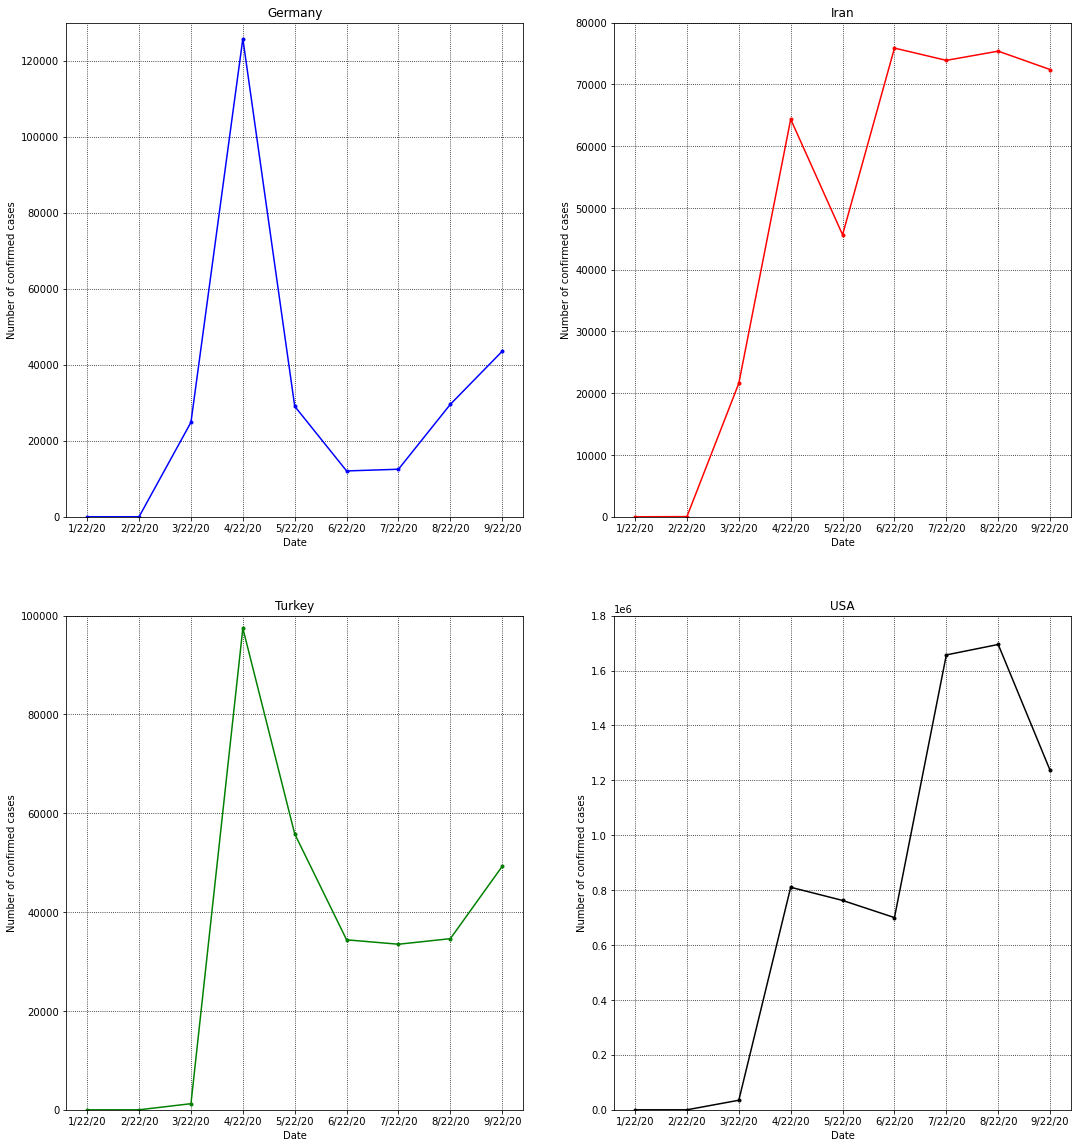

In [30]:
# 3rd group: Germany, Iran, Turkey, USA.
plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
plt.plot(peak_decline.Germany, 'b.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Germany')
plt.ylim(0,130000)

plt.subplot(2,2,2)
plt.plot(peak_decline.Iran, 'r.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Iran')
plt.ylim(0,80000)

plt.subplot(2,2,3)
plt.plot(peak_decline.Turkey, 'g.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Turkey')
plt.ylim(0,100000)

plt.subplot(2,2,4)
plt.plot(peak_decline.USA, 'k.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('USA')
plt.ylim(0,1800000);

In this group of countries, I chose Germany, Iran, Turkey, since the population in the above is about the same. And also I chose USA even if population is bigger than previous countries.

First, I want to analyze and compare countries other than the United States, since the population in these countries is about 84 million.

First of all, I want to mention the period from March to April, because this is one of the key periods, because at this time all 3 countries saw a sharp jump, for example, if Germany had about 25,000 people at the end of March, then by the end of April this increased to 125775. But compared to Iran, Germany has seen many more cases during this period. In Iran, between March 22 and April 22, the number of new confirmed cases increased to only half of the new cases in Germany, i.e., in Iran, it was 64,328. And in Turkey, if the number of confirmed cases was closer to zero on March 22, then on April 22, statistics showed about 100,000 people. To be honest, I do not know what is the reason for such a sharp explosion of new cases in Turkey, but in the following months, new cases decreased in number.

Secondly, I would like to note the periods of time when there was a decline in the detection of new cases. In Germany, this is the period from April 22 to June 22, because it decreased from 125775 to 16000 approximately, and in Turkey, this decline continued until the end of August,but then the jump went back. I believe that this is due to the beginning of the second wave of coronavirus.

Third, I want to view statistics in the United States separately. To date, the United States has identified about 20% of all cases worldwide. For example, on 13.11.2020, due to the presidential election, there were clusters of people and 181194 people were identified. However, if we consider this graph, in the period from January to September, the peak of the epidemic was at the end of August and was about 1 694 491 people. In this line chart, we can see that there were 2 virus declines in the US, this is from the end of April to the end of June and the second from the end of August to the end of September. 

### Q5: Analyze the number of people who were able to recover around the world, by month 


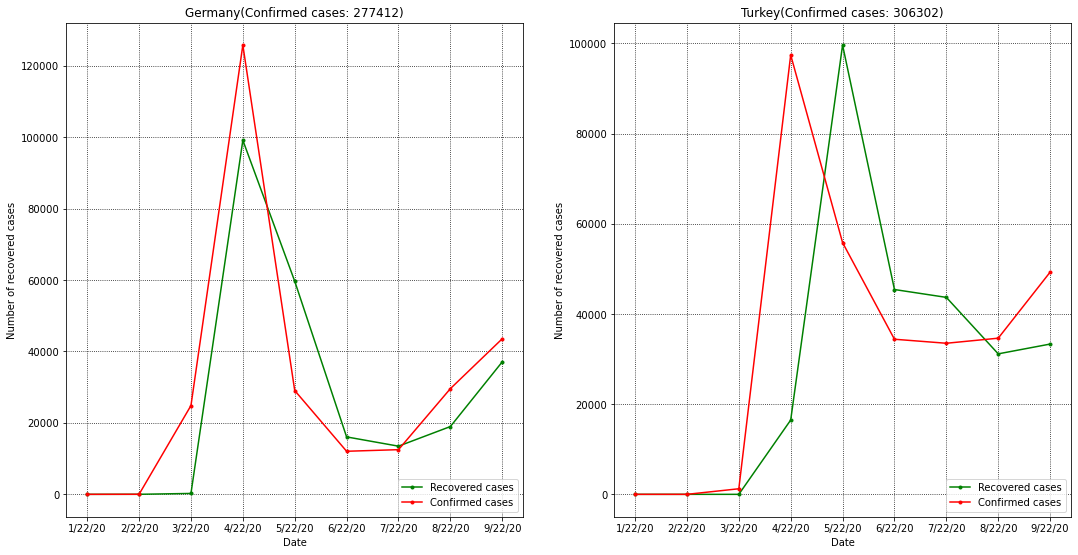

In [52]:
# Germany, Turkey
plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
plt.plot(rec_transp.Germany, 'g.-')
plt.plot(peak_decline.Germany, 'r.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of recovered cases')
plt.legend(['Recovered cases', 'Confirmed cases'], loc=4)
plt.title('Germany(Confirmed cases: 277412)')

plt.subplot(2,2,2)
plt.plot(rec_transp.Turkey, 'g.-')
plt.plot(peak_decline.Turkey, 'r.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of recovered cases')
plt.legend(['Recovered cases', 'Confirmed cases'], loc=4)
plt.title('Turkey(Confirmed cases: 306302)');


In each of these 2 graphs, there are two lines that show the number of abstained cases and confirmed cases. Let's start with the first graph. We can see that their ratio is quite good, because if at some time a lot of cases were detected, then in the next month the number of cured people is much higher, because there are few critical cases and most people overcome the disease. And using the second graph, we can conclude that medicine in Germany is better than in Turkey, because if you take the time from March 22 to April, for example, in Germany during this period 125,000 people fell ill and about 100,000 people were immediately cured, and in Turkey, out of 97,000 people, only 17,000 were cured. The difference is very huge and it shows that in Germany, medicine is better. However, it should be noted that 100,000 people were treated in Turkey in the next month, which shows that medicine in Turkey is also well developed.

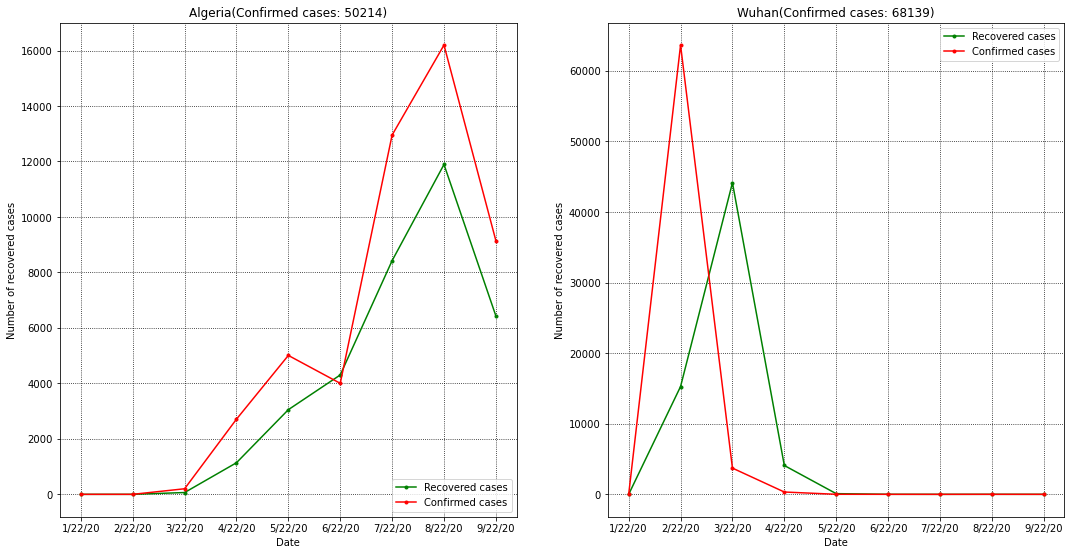

In [55]:
# Wuhan, Algeria
plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
plt.plot(rec_transp.Algeria, 'g.-')
plt.plot(peak_decline.Algeria, 'r.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of recovered cases')
plt.legend(['Recovered cases', 'Confirmed cases'], loc=4)
plt.title('Algeria(Confirmed cases: 50214)')

plt.subplot(2,2,2)
plt.plot(rec_transp.Wuhan, 'g.-')
plt.plot(peak_decline.Wuhan, 'r.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of recovered cases')
plt.legend(['Recovered cases', 'Confirmed cases'], loc=1)
plt.title('Wuhan(Confirmed cases: 68139)');

First, you can immediately notice the difference in medicine. As I mentioned earlier, a hospital was built in Wuhan in just 10 days, and then a couple more hospitals were built. But Algeria is a third world country and medicine is very little developed, so the number of new cases always exceeds the number of cured cases. In the second graph, you can see that since the end of may, both indicators are equal to zero, that is, in Wuhan, everyone has recovered and the city has defeated the virus.

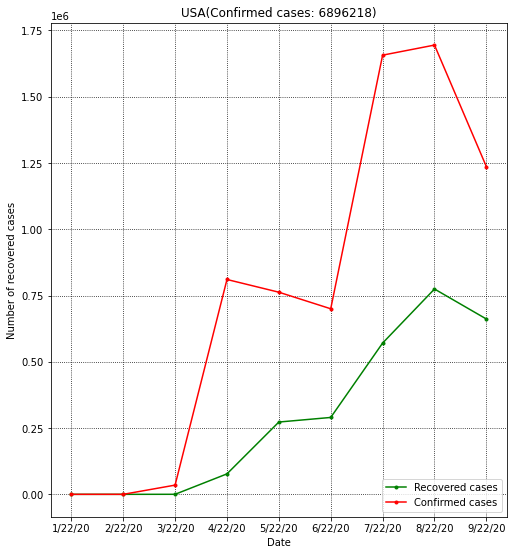

In [53]:
# USA
plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
plt.plot(rec_transp.USA, 'g.-')
plt.plot(peak_decline.USA, 'r.-')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Number of recovered cases')
plt.legend(['Recovered cases', 'Confirmed cases'], loc=4)
plt.title('USA(Confirmed cases: 6896218)');

This ratio between the two lines is not very pleasing to us, because the number of cured does not come closer to the new case. This suggests that new cases are found much faster than cured cases. For example, in one month(March-April), 760000 people were found approximately, and the number of recovered 100,000 approximately. I think this is due to the fact that medicine has not previously met such an epidemic and has not yet found a complete vaccine against the virus

# 5. Conclusion

Referring to the analysis above, we can make a couple of conclusions about how COVID-19 affected these 10 countries and the world as a whole:

Firstly, medicine around the world is not so developed. If appears the virus even stronger than the coronavirus, the consequences can be 3 times worse. But if the world keeps up with the times, thanks to new technologies, we can defeat any kind of virus;

Secondly, the most pandemic country in period of time from 22th January to 22th September is USA , with 6 896 217 total confirmed cases

Thirdly, COVID-19 affected not only the population, but also other aspects of life, such as the economy. Many companies were forced to close due to the quarantine regime

And some interesting conclusions which I noticed:
+ Even if the populations of Algeria and Argentina are almost the same(43,851,044 and 45,195,774) the total cases in Argentina is 652,174 while in Algeria it is 50,214. One of the main reason, that in Algeria not so more cases is that the share of African countries in international passenger traffic is relatively small and most cases are registered in countries that are more integrated into the world economy and attract tourists. 
+ Germany/Turkey/Iran with population respectively(83,783,942 / 84,339,067 / 83,992,949) but death cases in Iran is much bigger. If Germany and Turkey has almost 9000 deaths, in Iran this value is 24656.
+ Population of Kazakhstan is 18,776,707 while Zambia has 18,383,955 people. Confirmed cases in Zambia = 14389, but in Kazakhstan is equal to 107,450 but 102,064 cases was recovered. It means, our medicine not so bad and we have a good chance to overcome this pandemic
+ Medicine of Germany is much better than Turkey


##### And finally, I hope that world will overcome this virus and everything will be good 